---
# Configuration file for post-processing Salish Sea Model results
# Setup for PERS conference presentation on Whidbey basin river loading influences
---


In [1]:
import sys
import yaml
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

## Define main directory 

In [2]:
# Main dictionary used to output values to SSM_config.yaml
ssm = {}
case = "whidbeypers"

## Model variable names for two versions of model output
- The model output used in the bounding scenario runs names variables as "Var_XX". `model_tags` is a dictionary that relates variable names to the model output names.  i.e. ```ssm['var_name']['DO'] yields 'Var_10'```, which is the SSM variable name for "DO"
- The output netcdf from Ben's C++ script yields the `name_list` of variables 

In [3]:
ssm['variables']={}

# King County runs
ssm['variables']['name_list']=['time','depth','DOXG','LDOC','B1','B2',
                    'NH4','NO3','PO4','temp','salinity','RDOC','LPOC',
                    'RPOC','TDIC','TALK','pH','pCO2'] 

## Create array of percentages for depth levels
Multiply these values by the total depth of the water column to get the layer thickness for each model level. This layer thickness is used to calculate volume days.
These values were provided by Su Kyong Yun in her script `volume_calculation.py` on 6/9/2022.

In [4]:
ssm['siglev_diff']=numpy.array(
    [ 3.2,  5.7,  7.5,  8.9, 10.1, 11.1, 12.1, 13. , 13.8, 14.6]
).tolist() #b/c safedump dosn't allow for objects
# # Updated values given by Su Kyong August 10th, 2022, via Teams chat. 
# ssm['siglev_diff']=numpy.array(
#     [3.2, 5.8, 7.4, 9, 9.8, 11.4, 11.8, 13.4, 13.4, 15]
# ).tolist() #b/c safedump dosn't allow for objects

In [5]:
sum(ssm['siglev_diff'])

99.99999999999999

### Define WWTP and river names

In [6]:
# The following WWTP names are from the "Table NLoading1" tab of 
# https://uwnetid.sharepoint.com/:x:/r/sites/og_uwt_psi/_layouts/15/Doc.aspx?sourcedoc=%7B3788B09C-126F-40BF-86AF-22DEC185E831%7D&file=SOG_NB_Figures%26Tables.xlsx&action=default&mobileredirect=true

# The two spaces in front of names reflects formatting of column names in 
# excel spreadsheet
ssm['WWTP_names'] = [
  "  Coupeville",
  "  Everett Snohomish",
  "  La Conner",
  "  Lake Stevens 002",
  "  Langley",
  "  Marysville",
  "  Mt Vernon",
  "  Mukilteo",
  "  Oak Harbor Lagoon",
  "  OF100",
  "  Penn Cove",
  "  Skagit County 2 Big Lake",
  "  Snohomish",
  "  Stanwood",
  "  Swinomish",
  "  Tulalip",
  "  Warm Beach Campground"
]

# Some rivers discharge into more than one node and have nutrient
# loading in two columns (namely: Nooksack and Samish Bell).
# Nutrient loading for these rivers is the sum of the columns
ssm['river_names'] = [
  "  Skagit R_1",
  "  Skagit R_2",
  "  Snohomish R_1",
  "  Snohomish R_2",
  "  Stillaguamish R_1",
  "  Stillaguamish R_2",
  "  Whidbey east"
]

ssm['unique_river_names']=[
    "Skagit",
    "Snohomish",
    "Stillaguamish",
    "Whidbey east"
]

## Define colors used for color plots
See [this cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png) or [this list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for more color options

purple
teal
royalblue
slategrey
darkslategrey
steelblue
royalblue
midnightblue


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


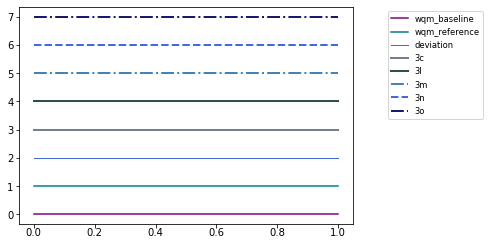

In [7]:
ssm['line']={}
ssm['line']['color']={}
ssm['line']['width']={}
ssm['line']['style']={}

ssm['line']['color']['wqm_baseline'] = 'purple'
ssm['line']['color']['wqm_reference'] = 'teal'
ssm['line']['color']['deviation'] = 'royalblue'
ssm['line']['color']['3c'] = 'slategrey'
ssm['line']['color']['3l'] = 'darkslategrey'
ssm['line']['color']['3m'] = 'steelblue'
ssm['line']['color']['3n'] = 'royalblue'
ssm['line']['color']['3o'] = 'midnightblue'

ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['wqm_reference'] = 1.5
ssm['line']['width']['deviation'] = 1
ssm['line']['width']['3c'] = 2
ssm['line']['width']['3l'] = 2
ssm['line']['width']['3m'] = 2
ssm['line']['width']['3n'] = 2
ssm['line']['width']['3o'] = 2


ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['wqm_reference'] = 'solid'
ssm['line']['style']['deviation'] = 'solid'
ssm['line']['style']['3l']='solid'
ssm['line']['style']['3c']='solid'
ssm['line']['style']['3m']='dashdot'
ssm['line']['style']['3n']='dashed'
ssm['line']['style']['3o']= 'dashdot'

# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,run in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][run])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][run],
            linestyle=ssm['line']['style'][run],
            linewidth=ssm['line']['width'][run],
            label=run)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

## Define black and white line-style formatting

In [8]:
ssm['bw_line']={}
ssm['bw_line']['color']={}
ssm['bw_line']['width']={}
ssm['bw_line']['style']={}
# All scenarios
ssm['bw_line']['color']['scenario']='grey'
ssm['bw_line']['width']['scenario']=1.5
ssm['bw_line']['style']['scenario']='dashed'
# 2014 Baseline condition
ssm['bw_line']['color']['baseline']='black'
ssm['bw_line']['width']['baseline']=1
ssm['bw_line']['style']['baseline']='solid'
# Reference condition
ssm['bw_line']['color']['reference']='black'
ssm['bw_line']['width']['reference']=1.5
ssm['bw_line']['style']['reference']='dashdot'

## Define colors for different parameters

In [9]:
ssm['bar']={}
ssm['bar']['colors']={}
ssm['bar']['colors']['DOXG']='deepskyblue'
ssm['bar']['colors']['NO3']='y'
ssm['bar']['colors']['NH4']='darkolivegreen'

ssm['region']={}
ssm['region']['colors']={}
ssm['region']['colors']['Hood']='darkseagreen'
ssm['region']['colors']['Main']='mediumpurple'
ssm['region']['colors']['SJF_Admiralty']='lightsteelblue'
ssm['region']['colors']['SOG_Bellingham']='rosybrown'
ssm['region']['colors']['South_Sound']='c'
ssm['region']['colors']['Whidbey']='cornflowerblue'
ssm['region']['colors']['ALL_REGIONS']='black'

## Define location(s) for model output and graphics files

## Path definitions

In [10]:
# directory for Su Kyong's runs
root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/'

# directory for Rachael's runs
root_output_rdm = (
    "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/"
)
#'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output'

ssm['paths']={}
ssm['paths']['model_output']={}
# cases
ssm['paths']['model_output'][case] = [
    root_output+'wqm_baseline/ssm_output.nc',
    root_output+'wqm_reference/ssm_output.nc',
    root_output+'3c/ssm_output.nc',
    root_output_rdm+'3l/hotstart_rdm.nc',
    root_output+'3m/ssm_output.nc',
    root_output_rdm+'3n/ssm_hotstart_3n.nc',
    root_output_rdm+'3o/ssm_hotstart_3o.nc'
]

ssm['paths']['processed_output'] = ( 
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/'
)

# Define directory for saving graphics output
ssm['paths']['graphics'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/'
)

# Define directory for saving graphics output
ssm['paths']['movies'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/movies/'
)

# Define location and name of Shapefile to use for planar graphics
# This version corrects typos in region names and imposes a uniform format for 
# region names
ssm['paths']['shapefile'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-grid/'\
    'shapefiles/SSMGrid2_tce_ecy_node_info_v2_10102022/SSMGrid2_tce_ecy_node_info_v2_10102022.shp' 
)
# ssm['paths']['shapefile'] = (
#     '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/'\
#     'shapefiles/SSMGrid2_tce_ecy_node_info_v2_09292022/SSMGrid2_tce_ecy_node_info_v2_09292022.shp'
# )

# Nutrient loading input files
ssm['paths']['nutrient_loading_inputs']={
    'wqm_baseline':root_output+'WQM/WQM/hotstart/inputs/ssm_pnt_wq.dat',
    'wqm_reference':root_output+'WQM_REF/WQM_REF/hotstart/inputs/ssm_pnt_wq.dat',
    '3c':root_output+'3c/inputs/ssm_pnt_wq.dat',
    '3l':root_output_rdm+'3l/hotstart/inputs/ssm_pnt_wq.dat',
    '3m':root_output+'3m/inputs/ssm_pnt_wq.dat',
    '3n':root_output_rdm+'3n/hotstart/inputs/ssm_pnt_wq.dat',
    '3o':root_output_rdm+'3o/hotstart/inputs/ssm_pnt_wq.dat',
}

## Run information

In [11]:
ssm['run_information']={}
ssm['run_information']['run_tag']={}

# Number of spin-up days removed from model output in post-processing
ssm['run_information']['spin_up_days']=5

# Run descriptions and names
ssm['run_information']['baseline']='wqm_baseline'
ssm['run_information']['reference']='wqm_reference'
ssm['run_information']['whidbeypers_rivers']={
    'wqm_baseline':'2014 conditions',
    'wqm_reference':'Reference conditions',
    '3c':'Wr1',
    '3l':'Wr2',
    '3m':'Wr3',
    '3n':'Wr4',
    '3o':'Wr5'
}

ssm['run_information']['run_description_short']={}
ssm['run_information']['run_description_short'][case]={
    'wqm_baseline':'2014 conditions',
    'wqm_reference':'Reference',
    '3c':'No Whidbey Rivers',
    '3l':'0.5x Industrial River Load',
    '3m':'2x 2014 River Load',
    '3n':'No Snohomish River',
    '3o':'0.5x Snohomish River'
}

ssm['run_information']['run_tag'][case]={
    'wqm_baseline':'2014 Conditions',
    'wqm_reference':'Reference',
    '3c':'Wr1',
    '3l':'Wr2',
    '3m':'Wr3',
    '3n':'Wr4',
    '3o':'Wr5'
}

In [12]:
[*ssm['run_information']['run_tag'][case]]

['wqm_baseline', 'wqm_reference', '3c', '3l', '3m', '3n', '3o']

In [13]:
tag_list = [ssm['run_information']['run_tag'][case][tag] for tag in [*ssm['run_information']['run_tag'][case]]]

In [14]:
tag_list.remove('Reference')

In [15]:
[*ssm['run_information']['run_description_short'][case]]

['wqm_baseline', 'wqm_reference', '3c', '3l', '3m', '3n', '3o']

In [16]:
[*ssm['run_information']['run_description_short']]

['whidbeypers']

## Save specifications to file
-Use `sort_keys=False` to preserve dictionary order

In [17]:
with open('SSM_config_whidbeypers.yaml', 'w') as file:
    document = yaml.safe_dump(ssm, file,sort_keys=False)

In [18]:
ssm['run_information']['run_tag'][case]

{'wqm_baseline': '2014 Conditions',
 'wqm_reference': 'Reference',
 '3c': 'Wr1',
 '3l': 'Wr2',
 '3m': 'Wr3',
 '3n': 'Wr4',
 '3o': 'Wr5'}